***Prédire le succès d'une campagne de marketing bancaire à l'aide de l'apprentissage automatique***.



***1.Introduction:***

Avec le développement spectaculaire, au cours des dernières décennies,les       médias et la technologie qui augmentent la quantité d'informations que nous avons à portée de main (téléphones portables, télévision, Internet, etc.), les êtres humains sont aujourd'hui plus connectés que jamais. L'une des conséquences est que les campagnes de marketing sont de plus en plus nombreuses dans notre vie quotidienne. Cette surabondance de publicité a forcé les entreprises à rivaliser pour attirer l'attention d'une population . D'où la question suivante : Comment les entreprises peuvent-elles réussir à faire de la publicité pour leurs produits de la manière la plus efficace possible et avec le taux de réussite le plus élevé possible ? Nous répondrons à cette question dans le contexte des banques qui font de la publicité pour des produits de dépôt à terme fixe auprès de leurs clients. En utilisant les données collectées lors d'une précédente campagne de marketing bancaire, un certain nombre de caractéristiques centrées sur les clients, la campagne elle-même et les conditions générales du marché seront explorées. Sur la base de ces données, des modèles d'apprentissage automatique prédiront quels clients souscriront et ce que les banques peuvent faire pour augmenter le taux de souscription.




**2.problematique:**

 Améliorer la campagne de marketing de dépôt à terme fixe d'une banque en analysant les données de   ses campagnes de marketing précédentes et en recommandant les clients à cibler.

 Qu'est-ce qu'un dépôt à terme ?
 Un dépôt à terme est un dépôt qu'une banque ou une institution financière propose à un taux fixe (souvent mieux que la simple ouverture d'un compte de dépôt) dans lequel votre argent vous sera restitué à une échéance spécifique.



**1.visualisation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/projet hamza/bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Description des données**

In [5]:
df.shape

(11162, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


La base de données contient 11162 éléments, et 17 caractéristiques Ils peuvent être affichés comme suit:

 *-Caractéristiques:*

 1- Age |int64|:âge en années.

 2- Emploi |Object|:type d'emploi (catégorique : 'admin.', 'ouvrier', 'entrepreneur', 'femme de ménage', 'gestion', 'retraité', 'indépendant', 'services', 'étudiant' ,'technicien','chômeur','inconnu')

 3- Matrimonial |Object|: état civil (catégorique : 'divorcé', 'marié', 'célibataire', 'inconnu' ; note : 'divorcé' signifie divorcé ou veuf)

 4- Education |Object|: (catégorique : primaire, secondaire, tertiaire et inconnu)

 5- Défaut|Object|: le crédit est-il en défaut ? (catégorique : "non", "oui", "inconnu")

 6– Logement|Object|: a-t-il un prêt logement ? (catégorique : "non", "oui", "inconnu")

 7– Prêt|Object|: a-t-il un prêt personnel ? (catégorique : "non", "oui", "inconnu")

 8- équilibre|int64|: Equilibre de l'individu.

 9- Contact|Object|: type de communication du contact (catégorique : 'cellulaire', 'téléphone')

 10- Mois|Object| : mois du dernier contact de l'année (catégorique : 'jan', 'feb', 'mar', ..., 'nov', 'dec')

 11- Jour|int64| : dernier jour de contact de la semaine (catégorique : 'lundi', 'mardi', 'mercredi', 'jeu', 'ven')

 12- Durée|int64| : durée du dernier contact, en secondes (numérique)

 13- Campagne|int64|: nombre de contacts effectués lors de cette campagne et pour ce client (numérique, inclut le dernier contact)

 14- Pdays|int64|: nombre de jours écoulés après que le client a été contacté pour la dernière fois lors d'une campagne précédente (numérique ; 999 signifie que le client n'a pas été contacté auparavant)

 15 - Précédent|int64|: nombre de contacts effectués avant cette campagne et pour ce client (numérique)

 16- Poutcome|Object|: résultat de la campagne marketing précédente (catégorique : 'échec', 'inexistant', 'succès')

 -*Variable de sortie (cible souhaitée) :*

 17 Deposit|Object|: le client a souscrit un dépôt à terme ? (binaire : 'oui', 'non')

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


L'âge moyen est d'environ 41 ans (minimum : 18 ans et maximum : 95 ans).

Balance:la moyen est de 1528. Cependant, l'écart-type (std) est élevé, ce qui nous permet de conclure que le solde est fortement réparti dans l'ensemble des données.

**chercher les données manquantes**



In [8]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Aucune valeur manquante n'a été trouvée.

**4-Explorer les caractéristiques:**

*A-Explorer les caractéristiques catégorielles*

In [9]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


il y a 9 caractéristiques catégorielles,emploi et mois a le plus grand nombre de valeurs catégorielles

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

<ipython-input-13-25bbd5ab4d25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_feature,data=df,palette='viridis')
<ipython-input-13-25bbd5ab4d25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_feature,data=df,palette='viridis')
<ipython-input-13-25bbd5ab4d25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=categorical_feature,data=df,palette='viridis')
<ipython-input-13-25bbd5ab4d25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

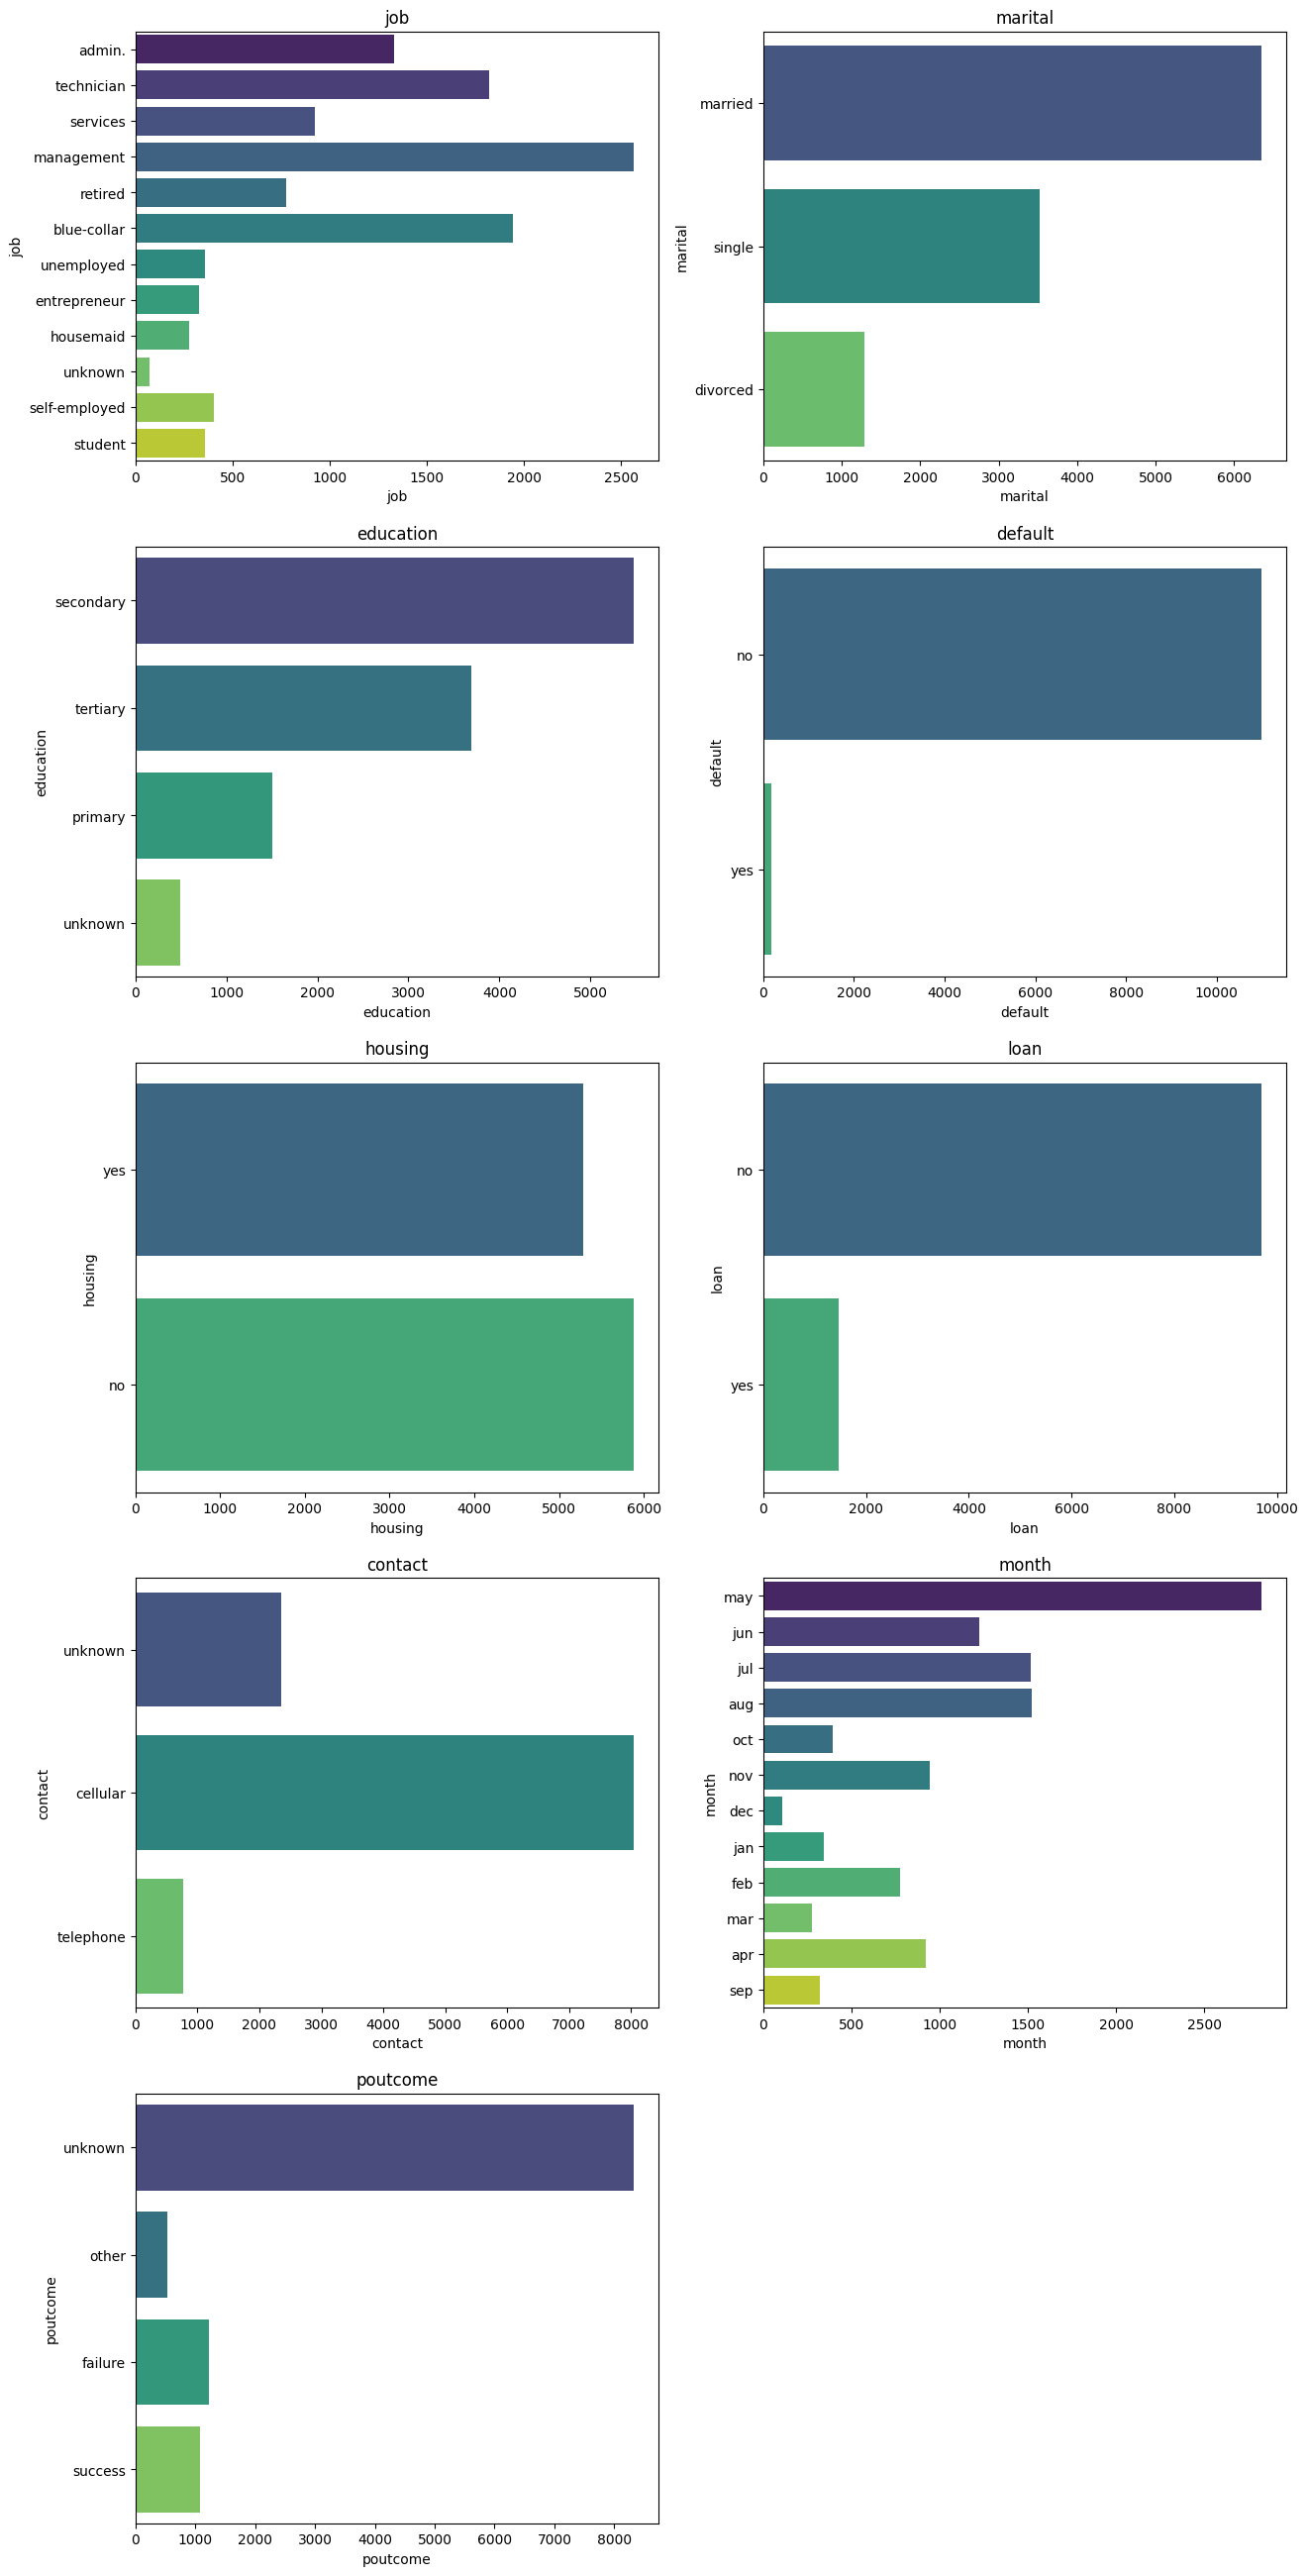

In [13]:

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df,palette='viridis')
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- les clients dont le type d'emploi est la gestion sont nombreux dans l'ensemble de données donné et les femmes de ménage sont très peu nombreuses

- les clients mariés sont nombreux dans les enregistrements de l'ensemble de données donné et les clients divorcés sont moins nombreux.

- les clients dont le niveau d'études est secondaire sont très nombreux dans l'ensemble de données.

- la caractéristique défectueuse semble ne pas jouer un rôle important car la valeur de non est élevée par rapport à la valeur de oui qui est plus faible.

- le mois du dernier contact de l'année:on a les données du mois de mai sont élevées et celles du mois de décembre le sont moin.

- Dans la plupart des cas, les clients sont contactés par téléphone mobile.

- Il semble qu'il n'y ait pas de grande différence entre les clients qui ont un logement et ceux qui n'en ont pas.

*B-Relation entre les caractéristiques catégorielles et Deposit:*

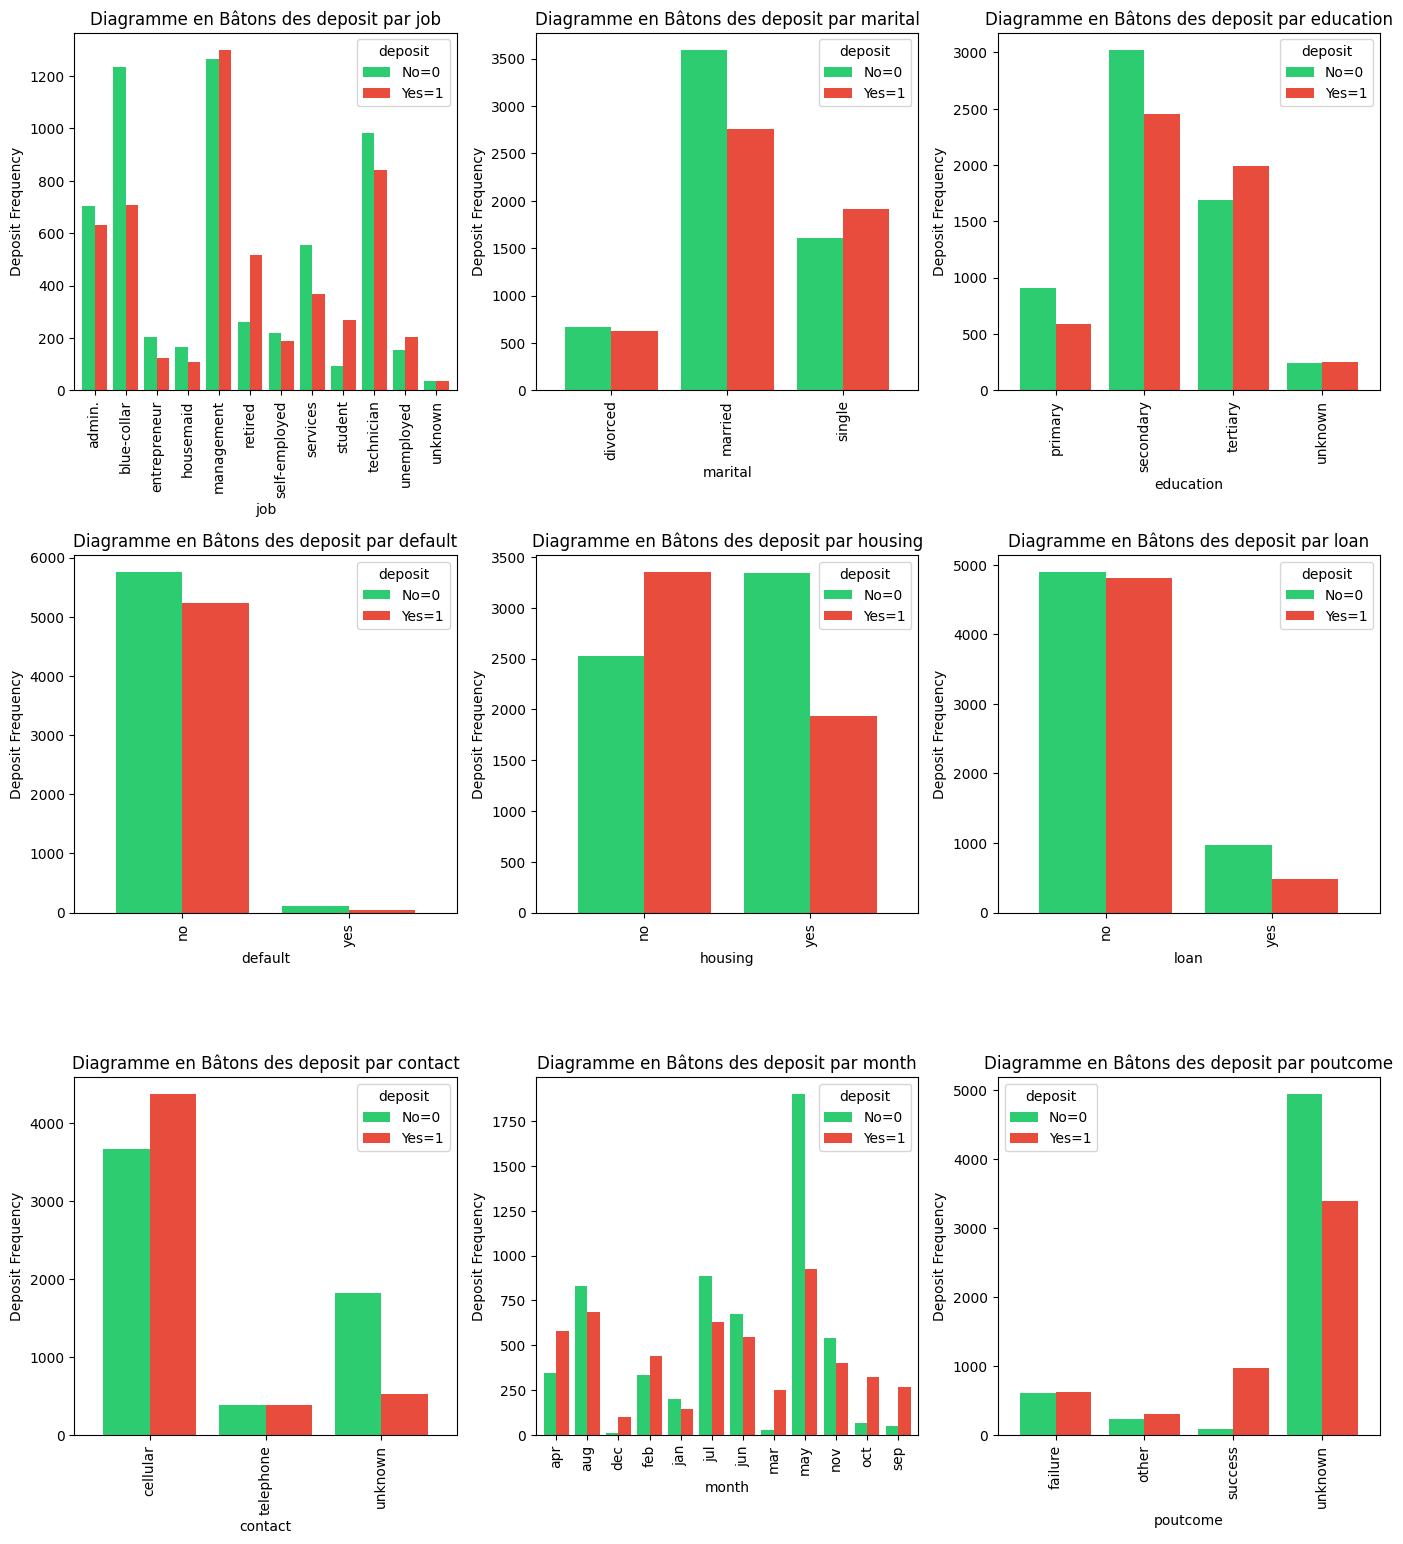

In [14]:
import matplotlib.pyplot as plt

def visualisation(c, ax):
    # Grouping and counting the data
    Survived_counts = df.groupby([c, 'deposit']).size().unstack(fill_value=0)

    # Plotting the data on the provided axis with custom colors
    Survived_counts.plot(kind='bar', width=0.8, ax=ax, color=['#2ecc71', '#e74c3c'])  # Custom colors

    # Adding labels and title
    ax.set_xlabel(c)
    ax.set_ylabel('Deposit Frequency')
    ax.set_title('Diagramme en Bâtons des deposit par ' + c)

    # Adding a legend
    ax.legend(title='deposit', labels=['No=0', 'Yes=1'])

# List of columns to visualize
l = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Number of rows and columns for subplots
n_rows = len(l) // 2 + len(l) % 2  # Two plots per row

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(14, 5 * n_rows), facecolor='white')

# Flatten axes array for easy iteration (handles both even and odd cases)
axes = axes.flatten()

# Loop through the columns and call the visualization function for each
for i, c in enumerate(l):
    visualisation(c, axes[i])  # Pass the corresponding axis to the function

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()

Vérifier la répartition de deposit (cible) sur les caractéristiques catégorielles et trouver le nombre.

In [15]:
for categorical_feature in categorical_features:
    grouped_data = df.groupby(['deposit', categorical_feature]).size().unstack(fill_value=0)
    print(f"Grouped data for {categorical_feature}:\n")
    print(grouped_data)
    print("\n" + "-"*50 + "\n")  # Add a separator between tables

Grouped data for job:

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
deposit                                                                      
no          703         1236           205        165        1265      262   
yes         631          708           123        109        1301      516   

job      self-employed  services  student  technician  unemployed  unknown  
deposit                                                                     
no                 218       554       91         983         155       36  
yes                187       369      269         840         202       34  

--------------------------------------------------

Grouped data for marital:

marital  divorced  married  single
deposit                           
no            671     3596    1606
yes           622     2755    1912

--------------------------------------------------

Grouped data for education:

education  primary  secondary  tertiary  unknown
depos

- Les caracteristique des clients qui ont une inscription élevée sur le dépôt à terme:

job:management/matrimonial:marié/education:secondary/éfaut: no/logement:no/prêt :no/contact:cellular/month:may/poutcome:unknown.

- Les caracteristique des clients qui ont une inscription non élevée sur le dépôt à terme:

job:management/matrimonial:marié/education:secondary/éfaut: no/logement:yes/prêt:no/contact:cellular/month:may/poutcome:unknown.


*C- Explorer les caractéristiques numériques continue:*

In [16]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

il y a 7 caractéristiques numériques

<ipython-input-17-d1b3f03588a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
<ipython-input-17-d1b3f03588a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_feature])
<ipython-input-17-d1b3f03588a2>:5: UserWarning: 

`distplot` is a deprecated function an

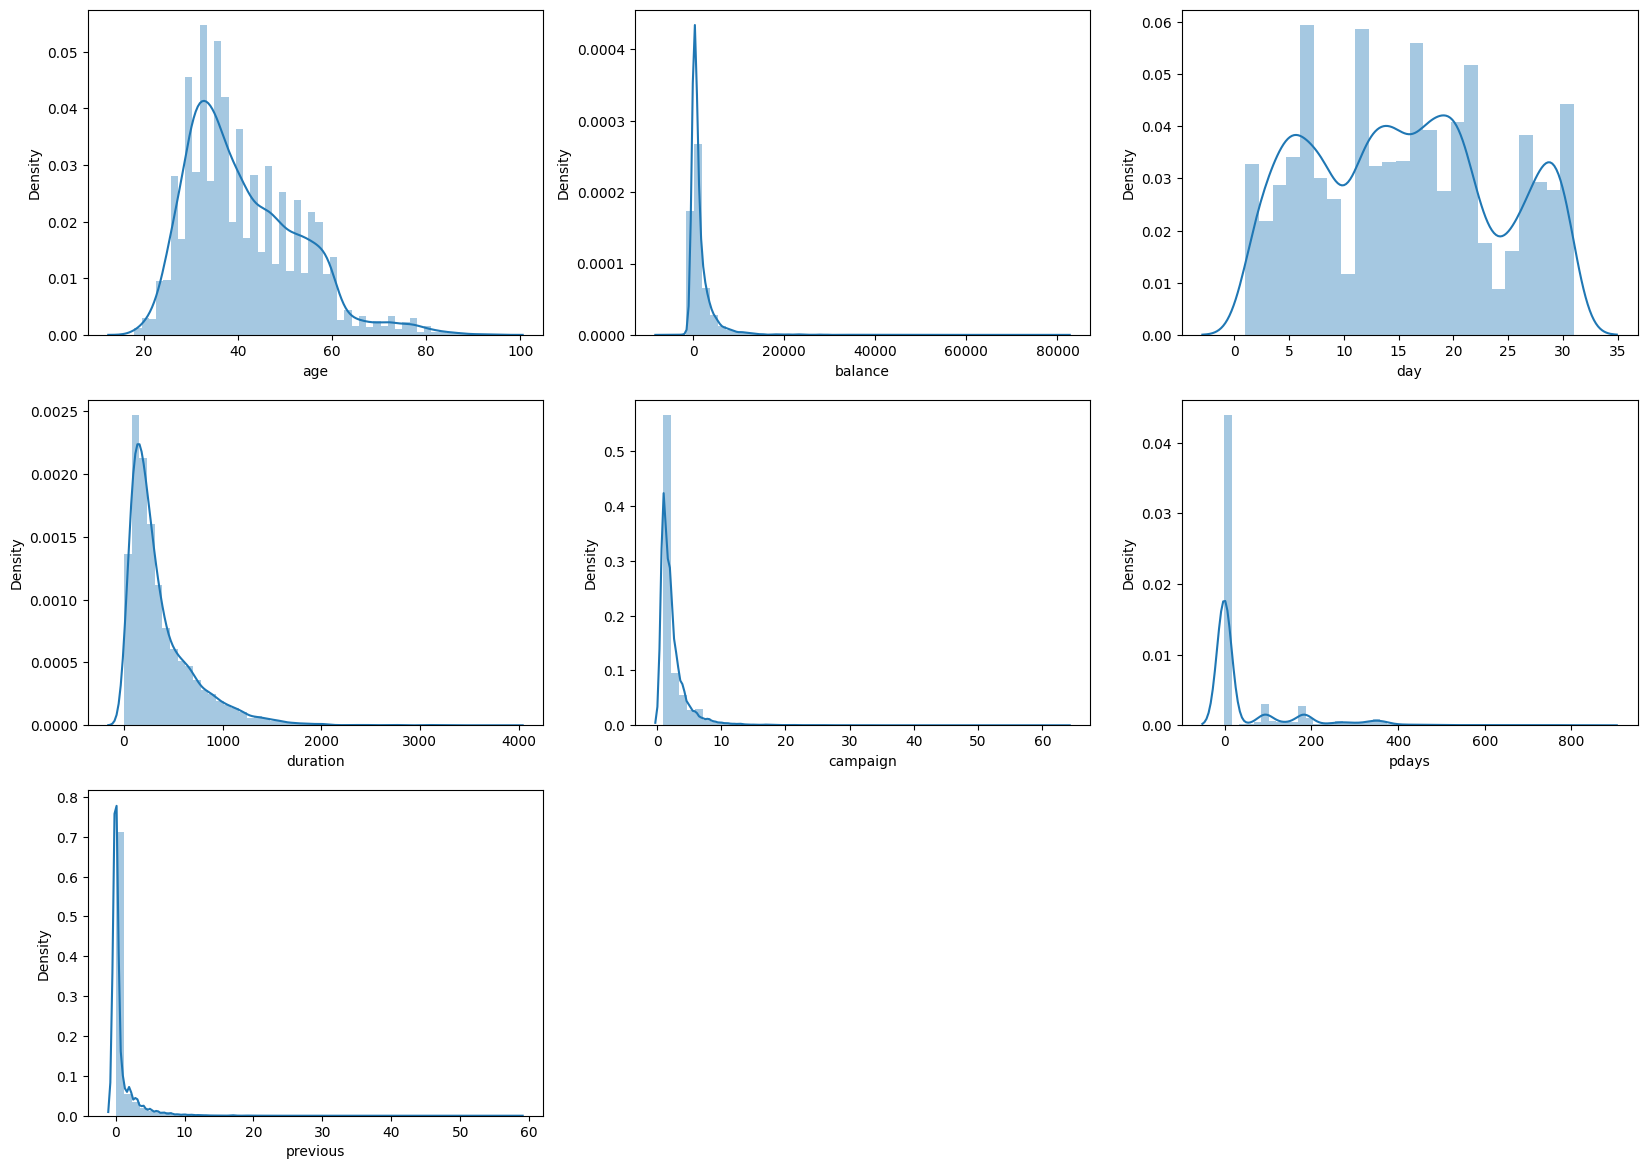

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

- Il semble que l'âge, les jours soient distribués normalement.
- balance, la durée, la campagne, les pdays et le précédent sont skewed vers la gauche.








D- Relation entre les caractéristiques numériques continues et Deposit:

<ipython-input-18-258bf0752cbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="deposit", x= df[feature], data=df, palette=palette)
<ipython-input-18-258bf0752cbf>:6: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(y="deposit", x= df[feature], data=df, palette=palette)
<ipython-input-18-258bf0752cbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="deposit", x= df[feature], data=df, palette=palette)
<ipython-input-18-258bf0752cbf>:6: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(y="deposit", x= df[feature], data=df, palette=palette)
<ipython-input-18-258bf0752cbf

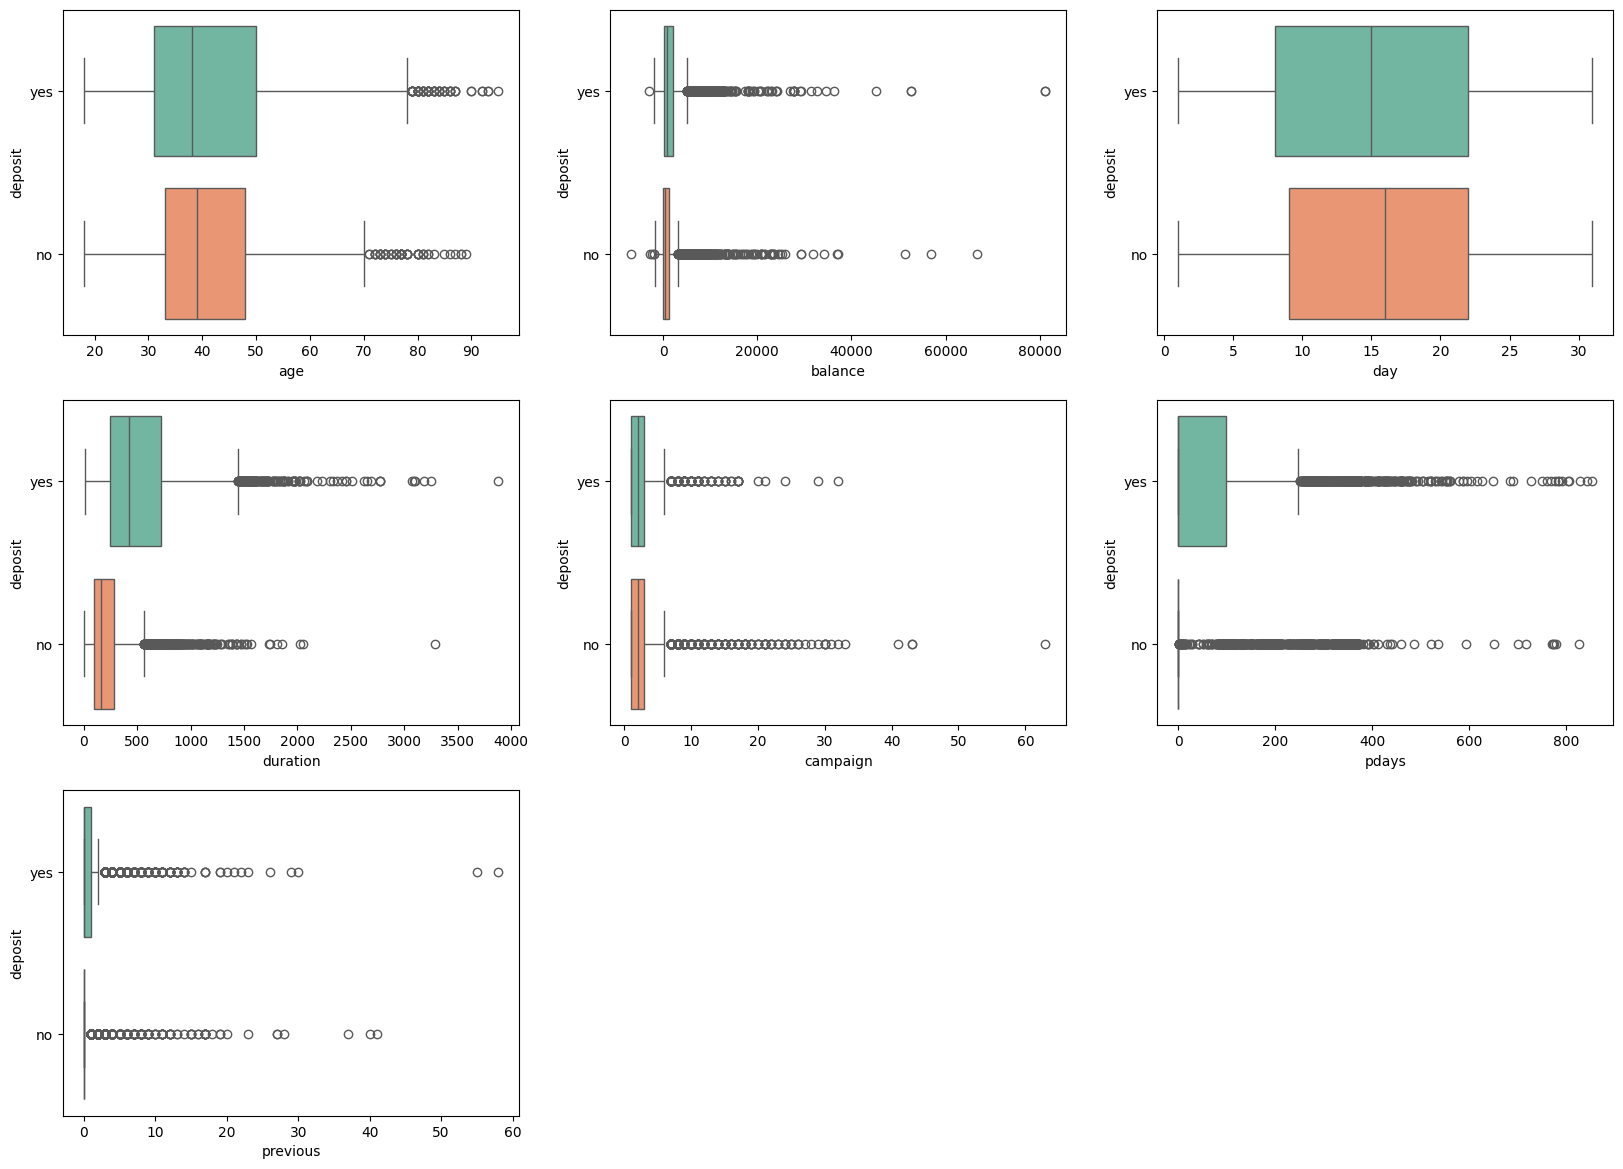

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
palette = sns.color_palette('Set2', n_colors=len(numerical_features))
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(y="deposit", x= df[feature], data=df, palette=palette)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

age: Les boxplots montrent que la distribution de l'âge pour les groupes deposit = 'yes' et deposit = 'no' est presque similaire, avec des médianes proches l'une de l'autre et positivement skweed. Cela indique que, globalement, les caractéristiques d'âge des personnes ayant un dépôt (yes) et celles n'en ayant pas (no) sont comparables.

duration:  Les boxplots montrent que la distribution de duration pour les groupes deposit = 'yes' et deposit = 'no' est non similaire, avec des médianes different l'une de l'autre  et positivement skweed.  Le client montre de l'intérêt sur le dépôt qui a été discuté pendant plus longtemps

day: la distribution est normal et symetrique dans les deux groupes,avec des médianes proches l'une de l'autre,Cela indique que, globalement, les caractéristiques day des personnes ayant un dépôt (yes) et celles n'en ayant pas (no) sont comparables.

precedent et compaigne: dans cette situation, le diagramme en boîte a une loneur réduite dans cette situation, on peut dire que les données sont moins dispersées, les clients qu'elle a déjà contactés lors de campagnes précédentes,
ils sont susceptibles de souscrire au dépôt à terme.


**5- Vérifier que l'ensemble des données est équilibré ou non en fonction des valeurs cibles de la classification.:**

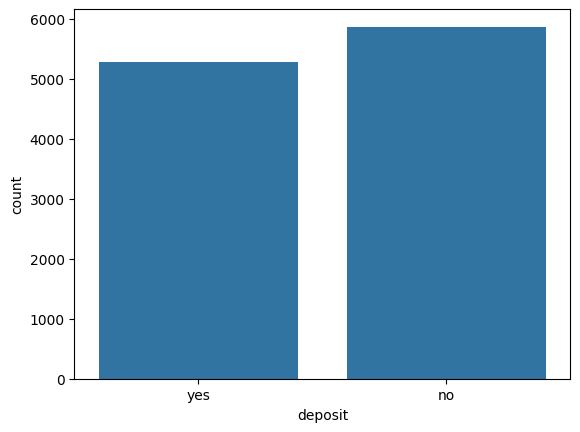

In [19]:
sns.countplot(x='deposit',data=df)
plt.show()

In [20]:
df['deposit'].groupby(df['deposit']).count()

,deposit
deposit,
no,5873
yes,5289


**5- Feature Engineering**:


 *Drop unwanted Features:*

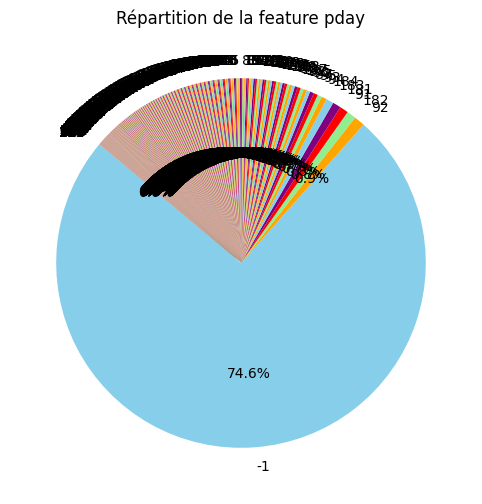

In [21]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt


# Créer un DataFrame
df_pday = pd.DataFrame(df)

# Calculer la répartition des valeurs dans la colonne pday
pday_counts = df_pday['pdays'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8, 6))
plt.pie(pday_counts, labels=pday_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'red', 'purple'])

# Ajouter un titre
plt.title('Répartition de la feature pday')

# Afficher le graphique
plt.show()

In [22]:
df_cleaning = df.drop(columns=['pdays','duration'])

In [23]:
df_cleaning.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,unknown,yes


La caractéristique « durée » a été abandonnée en raison du risque de fuite de données. Cette fonction mesure la durée de l'appel téléphonique entre le représentant marketing de la banque et le client. Étant donné que cette durée ne peut être connue qu'après la fin de l'appel (lorsque le résultat pour ce client est déjà connu), l'inclure dans un modèle prédictif ne donnerait pas de résultats réalistes.

pdays:Dans cet ensemble de données particulier, toutes les valeurs manquantes ont été donnees sous la forme « 999 », et ont été codées sous la forme « -1 ».On constate  que  la colonne « pdays » contient  « -1 » , elles constituent la majorité des données de cette caractéristique 74.6 %.

*Encodage des donnees categorielle*

L'encodage est utilisé pour convertir des données catégorielles en un format numérique que les modèles de machine learning peuvent comprendre et traiter. La majorité des algorithmes de machine learning ne peuvent pas traiter directement des variables catégorielles (non numériques), car ils nécessitent des valeurs numériques pour effectuer des calculs mathématiques

In [24]:
import pandas as pd
# Create mapping dictionaries
job_mapping = {'admin.':1,'technician':2,'services':3,'management':4,'retired':5,'blue-collar':6,'unemployed':7,'unknown':8,'student':9,'self-employed':10,'housemaid':11,'entrepreneur':12}
# Apply the mappings to the DataFrame
df_cleaning ['job'] = df_cleaning ['job'].map(job_mapping)


In [25]:
marital_mapping = {'married':1,'single':2,'divorced':3}
# Apply the mappings to the DataFrame
df_cleaning ['marital'] = df_cleaning ['marital'].map(marital_mapping)

In [26]:
education_mapping = {'secondary':1,'tertiary':2,'primary':3,'unknown':3}
# Apply the mappings to the DataFrame
df_cleaning['education'] = df_cleaning['education'].map(education_mapping)

In [27]:
default_mapping = {'no':1,'yes':2}
# Apply the mappings to the DataFrame
df_cleaning['default'] = df_cleaning['default'].map(default_mapping)

In [28]:
housing_mapping = {'yes':1,'no':0}
# Apply the mappings to the DataFrame
df_cleaning['housing'] = df_cleaning['housing'].map(housing_mapping)

In [29]:
loan_mapping = {'yes':1,'no':0}
# Apply the mappings to the DataFrame
df_cleaning['loan'] = df_cleaning['loan'].map(loan_mapping)

In [30]:
contact_mapping = {'unknown':1,'cellular':2,'telephone':3}
# Apply the mappings to the DataFrame
df_cleaning['contact'] = df_cleaning['contact'].map(contact_mapping)

In [31]:
month_mapping = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# Apply the mappings to the DataFrame
df_cleaning['month'] = df_cleaning['month'].map(month_mapping)

In [32]:
poutcome_mapping = {'unknown':1,'success':2,'failure':3,'other':3}
# Apply the mappings to the DataFrame
df_cleaning['poutcome'] = df_cleaning['poutcome'].map(poutcome_mapping)

In [33]:
deposit_mapping = {'yes':1,'no':0}
# Apply the mappings to the DataFrame
df_cleaning['deposit'] = df_cleaning['deposit'].map(deposit_mapping)

In [34]:
df_cleaning.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,deposit
0,59,1,1,1,1,2343,1,0,1,5,5,1,0,1,1
1,56,1,1,1,1,45,0,0,1,5,5,1,0,1,1
2,41,2,1,1,1,1270,1,0,1,5,5,1,0,1,1
3,55,3,1,1,1,2476,1,0,1,5,5,1,0,1,1
4,54,1,1,2,1,184,0,0,1,5,5,2,0,1,1


**7- Diviser l'ensemble de données en un ensemble de formation et un ensemble de test:**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Séparer les caractéristiques et la cible
X = df_cleaning.drop(columns=['deposit'])
y = df_cleaning['deposit']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
len(X_train)

8929

In [37]:
len(X_test)

2233

Nous avons classé la base de données comme suit:

test=20 %

train=80%

**8-Model de Prediction:**

In [38]:

# Créer et entraîner le modèle Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( n_estimators=1000,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluer le modèle Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.75


In [39]:
# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.svm import SVC
# Création d'un modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


Dans cette étude, nous avons évalué plusieurs modèles de machine learning pour prédire [Deposit]. Les modèles testés incluent la régression logistique, le support vector machine (SVM), et le Random Forest. L'objectif était d'identifier le modèle qui offre la meilleure performance en termes de précision (accuracy)

le modèle Random Forest a été retenu comme le meilleur modèle pour prédire [insérer la variable cible] avec une précision de 75%.

 le modèle de Random Forest pour prédire [deposit yes or no]. Le modèle a été entraîné sur un ensemble de données contenant [11162] observations et [13] variables.

Le modèle a atteint une précision (accuracy) de 74% sur l'ensemble de test, ce qui signifie que le modèle a correctement prédit 74% des cas.

**9- Discussion:**

- L'équipe de marketing devrait cibler des clients relativement âgés (≥29)
qui recherchent des options d'investissement sûres et
 rentables. Les spécialistes du marketing doivent veiller à transmettre la tranquillité d'esprit et la source de revenus régulière
que ces produits offrent comme proposition de valeur à ces clients.

- Bien que la variable « durée » (durée de l'appel téléphonique de marketing) n'ait pas été utilisée dans les modèles de prédiction pour diverses raisons citées précédemment, la corrélation de la variable « durée » avec la variable cible montre que plus la durée est élevée, plus il est probable que le client souscrira aux dépôts à terme . Cela a un sens intuitif, car une durée plus longue montre que le client est intéressé par le produit. Par conséquent, les spécialistes du marketing devraient essayer de rendre l'appel attrayant et d'en augmenter la durée de l'appel.
- Utiliser de préférence le celullaire comme mode de contact.

- L'équipe marketing doit donner la priorité aux clients
qu'elle a déjà contactés lors de campagnes précédentes,
ils sont susceptibles de souscrire au dépôt à terme.

**Conclusion:**

Ce projet nous a appris comment les banques peuvent améliorer leurs campagnes de marketing en concentrant leurs efforts sur certains clients de premier ordre. En combinant toutes ces stratégies et en simplifiant le public auquel la prochaine campagne devrait s'adresser, il est probable que la prochaine campagne de marketing de la banque sera plus efficace que la campagne actuelle.